In [13]:
import numpy as np
import scipy as sp
import pandas as pd
import sklearn 
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from rfms.readers import ForestReader
from rfms.storytellers import individual_signed_feature_importance
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate individual feature importance and visualization

In [11]:
options = dict()
raw_data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    raw_data.data, raw_data.target, train_size=0.5,
    random_state=2017)
rf = RandomForestClassifier(
    n_estimators=10, random_state=1231, max_depth = 2, bootstrap=True)
rf.fit(X=X_train, y=y_train)
#print(rf.estimators_[0].tree_.value[0])
b = ForestReader()
b.read_from(rf, X_test, TreeReaderType = 'Importance')
b.summary()
out, feature_importances_ = individual_signed_feature_importance(b, y_test)
print(out.head())
print(rf.feature_importances_)
print(feature_importances_)

/home/yu/miniconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Here is the summary.
Number of features is 30
Number of samples is 285
Number of paths is 39
Some samples from self.info_
   f0 f1       f2        f3 f4          f5        f6        f7 f8 f9  \
4   0  0        0         0  0           0         0   0.33377  0  0   
21  0  0        0         0  0           0 -0.502438         0  0  0   
0   0  0        0         0  0           0         0         0  0  0   
6   0  0        0         0  0           0         0 -0.512575  0  0   
32  0  0        0  0.243248  0           0         0 -0.758404  0  0   
30  0  0 -0.50503         0  0           0         0         0  0  0   
11  0  0        0         0  0 -0.00999369         0         0  0  0   
22  0  0        0         0  0           0 -0.502438         0  0  0   
5   0  0        0         0  0           0         0   0.33377  0  0   
9   0  0        0         0  0           0         0         0  0  0   

      ...       s278   s279   s280   s281   s282   s283   s284 tree_id  \
4     ...  

## Look at the most important feature F23

Text(0.5,0,'feature values')

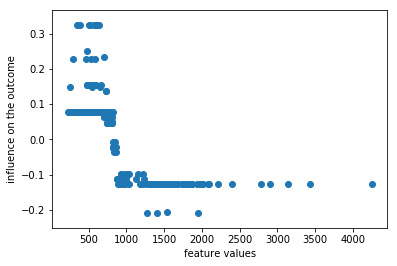

In [19]:
plt.scatter(X_test[:,23], out.loc[:,'f23'])
plt.ylabel('influence on the outcome')
plt.xlabel('feature values')

### F23 is very important, if it is smaller than ~700, it will increase the probability that a unit is from label 1 by 7%, if it is larger than 1000, it decreases the probability by 10%.

## Look at the second important feature F22

Text(0.5,0,'feature values')

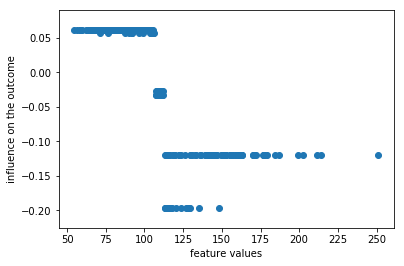

In [22]:
plt.scatter(X_test[:,22], out.loc[:,'f22'])
plt.ylabel('influence on the outcome')
plt.xlabel('feature values')

### The story is less clear.

## Look at 2 features together

Text(0.5,0,'F23')

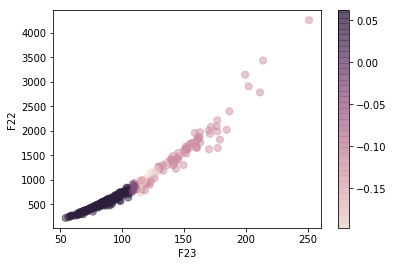

In [29]:
plt.scatter(X_test[:,22], X_test[:,23], c = out.loc[:,'f22'], s = 50, cmap = sns.cubehelix_palette(as_cmap=True), alpha=.5)
plt.colorbar()
plt.ylabel('F22')
plt.xlabel('F23')

### When F22 and F23 are large, it is more likely to be from class 0, otherwise it is more likely to be from class 1.